# Data Exploration & Myth Identification – Diabetes BRFSS Survey

# INCLUSION OF REQUIRED MODULES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Step 1: DATA ACQUISITION

**Include the XPT which contains raw data**

In [2]:
file_path = 'LLCP2024.XPT'

In [3]:
df = pd.read_sas(file_path,format='xport',encoding='utf-8')

# Step 2: DATA CLEANING AND WRANGLING

**2.1 For SAS Variable Name:DIABETE4 -> Diabetes**

In [4]:
dia_map = {
1.0: 'Yes',
2.0: 'Yes',
3.0: 'No',
4.0: 'Yes',#'Pre-diabetes/Borderline',
7.0: np.nan,
9.0: np.nan
}
df['Diabetes'] = df['DIABETE4'].map(dia_map)

**2.2 For SAS Variable Name:_BMI5 -> BMI_actual and Weight_Category**

In [5]:
#The function which is used to convert the BMI value to categorical value
def bmi_conversion(bmi):
    if not pd.isna(bmi):
        if bmi < 18.5: return 'Under weight'
        if bmi < 25.5: return 'Normal weight'
        if bmi < 30.0: return 'Over weight'
        return 'Obese'
    else:
        return np.nan

#Since the value in the Data set is without decimal value, it needs to be divided by 100 
df['BMI_actual'] = df['_BMI5']/100
df['BMI_actual'] = df['BMI_actual'].replace('BLANK', np.nan)
df['BMI_actual'] = df['BMI_actual'].astype(float)

#Better to have a seperate colums so that it can be used to get actual BMI number
df['Weight_Category'] = df['BMI_actual'].map(bmi_conversion)

**2.3 For SAS Variable Name:_SMOKER3 -> Smoking_condtion**

In [6]:
#The function which is used to convert the smoking integer value to to categorical value
def smoke_category(smk):
    if not pd.isna(smk):
        if smk == 1.0 : return 'Everyday'
        if smk == 2.0 : return 'Sometime'
        if smk == 3.0 : return 'Former'
        if smk == 4.0 : return 'Never'
        return np.nan
    else:
        return np.nan

df['_SMOKER3'] = df['_SMOKER3'].astype(float)
df['Somking_condtion'] = df['_SMOKER3'].map(smoke_category)

**2.4 For SAS Variable Name:_AGEG5YR -> Age_Group**

In [7]:
#The function which is used to convert the age in integer value to to categorical value
def age_group(age_code):
    if age_code in [1]:
        return 'Young adults'         #18 to 24
    if age_code in [2,3]:
        return 'Early working years'  #25 to 34
    if age_code in [4,5]:
        return 'Mid carrer adults'    #35 to 44
    if age_code in [6,7]:
        return 'Pre retirement'       #45 to 54
    if age_code in [8,9]:
        return 'Older working adults' #55 to 64
    if age_code in [10,11]:
        return 'Early Seniors'        #65 to 74
    return 'Elderly population'       #80 onwards

df['Age_Group'] = df['_AGEG5YR'].map(age_group)

#Changing the order of the age categories from default to the one as mentioned in the below order for data representation
age_order = [
    'Young adults',
    'Early working years',
    'Mid carrer adults',
    'Pre retirement',
    'Older working adults',
    'Elderly population',
    'Early Seniors'
]

df['Age_Group'] = pd.Categorical(df['Age_Group'],categories = age_order, ordered = True)

**2.4 For SAS Variable Name: EXERANY2 -> Exercise_Activites**

In [8]:
#Here the integer value is converted to categorical value with mapping function
df['Exercise_Activites'] = df['EXERANY2'].map({1:'Yes',2:'No',3:np.nan,4:np.nan})

**All the required data is cleaned and processed**

In [9]:
print('----------- Somking_condtion data cleaned ---------')
print(df['Somking_condtion'].value_counts(dropna=False))
print('---------------------------------------------------')
print('----------- Weight_Category data cleaned ---------')
print(df['Weight_Category'].value_counts(dropna=False))
print('---------------------------------------------------')
print('----------- BMI_actual data cleaned ---------')
print(df['BMI_actual'].value_counts(dropna=False))
print('---------------------------------------------------')
print('----------- Age_Group data cleaned ---------')
print(df['Age_Group'].value_counts(dropna=False))
print('-----------------------------------------------------')
print('----------- Exercise_Activites data cleaned ---------')
print(df['Exercise_Activites'].value_counts(dropna=False))
print('---------------------------------------------------')
print('----------- Diabetes data cleaned -----------------')
print(df['Diabetes'].value_counts(dropna=False))
print('---------------------------------------------------')

----------- Somking_condtion data cleaned ---------
Somking_condtion
Never       258956
Former      119598
Everyday     33118
NaN          32022
Sometime     13976
Name: count, dtype: int64
---------------------------------------------------
----------- Weight_Category data cleaned ---------
Weight_Category
Obese            139640
Normal weight    136266
Over weight      131350
NaN               43037
Under weight       7377
Name: count, dtype: int64
---------------------------------------------------
----------- BMI_actual data cleaned ---------
BMI_actual
NaN      43037
26.63     4428
27.44     3378
27.46     3364
24.41     3300
         ...  
13.96        1
34.91        1
21.78        1
60.74        1
51.83        1
Name: count, Length: 4199, dtype: int64
---------------------------------------------------
----------- Age_Group data cleaned ---------
Age_Group
Early Seniors           92475
Elderly population      86869
Older working adults    78323
Pre retirement          60666
Mid 

**All the data is convereted to its respective data type**

In [10]:
#The below mentioned data types are convereted to category type
df['Diabetes'] = df['Diabetes'].astype('category')
df['Age_Group'] = df['Age_Group'].astype('category')
df['Somking_condtion'] = df['Somking_condtion'].astype('category')
df['Exercise_Activites'] = df['Exercise_Activites'].astype('category')
df['Weight_Category'] = df['Weight_Category'].astype('category')

#BMI actual implies the actual BMI number hence it is assigned with float type
df['BMI_actual'] = df['BMI_actual'].astype('float')

# STEP 3 and STEP 4: 
# Exploratory Data Analysis (EDA) and Myth Identification

**3.1: Data analysis for plotiing of Percentage of Diabetes Cases by Age Groups**

In [11]:
age_diabetes = pd.crosstab(df['Age_Group'], df['Diabetes'], normalize='index') * 100
age_diabetes

Diabetes,No,Yes
Age_Group,,
Young adults,97.445687,2.554313
Early working years,95.139377,4.860623
Mid carrer adults,90.951502,9.048498
Pre retirement,83.371313,16.628687
Older working adults,77.472282,22.527718
Elderly population,76.094517,23.905483
Early Seniors,74.473570,25.526430


**4.1: A stacked bar graph ploting to visualise percentage of Diabetes Cases by Age Groups**

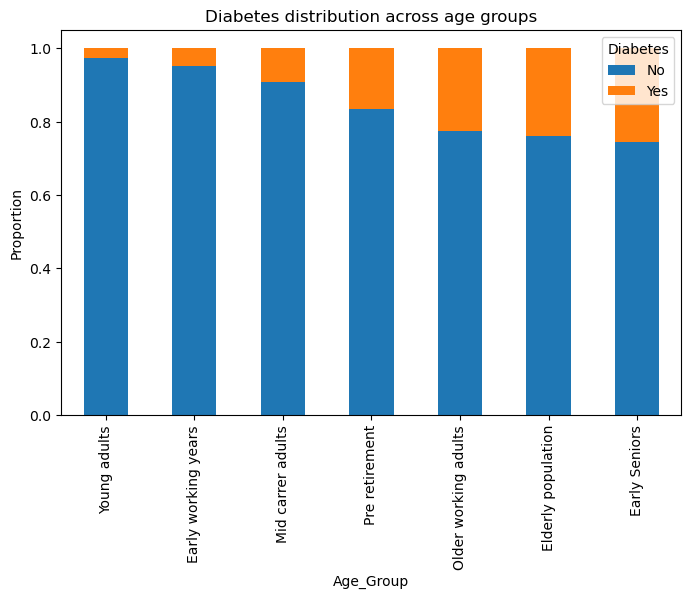

In [12]:
table_percent = age_diabetes.div(age_diabetes.sum(axis=1), axis=0)
table_percent = table_percent.sort_index(axis = 1, ascending = True)
table_percent.plot(kind='bar', stacked=True, figsize=(8,5))
plt.ylabel('Proportion')
plt.title('Diabetes distribution across age groups')
plt.legend(title='Diabetes')
plt.show()

**3.2: Data analysis for ploting of proportion of Diabetes Cases by Age Groups and Weight Categories**

In [13]:
# Order of BMI caategories that can be plotted in the heap map 
weight_order = ['Under weight', 'Normal weight', 'Over weight', 'Obese'] 

# Create a table showing the mean percentage of people with diabetes ('Yes') for each BMI category within every age group
table = pd.crosstab(df['Age_Group'], df['Weight_Category'], 
                    values=(df['Diabetes'] == 'Yes'), normalize = 'index',aggfunc='mean')*100

# Reorder BMI categories and reverse age group order
table = table.reindex(columns = weight_order)
table = table.iloc[::-1, :]
table

Weight_Category,Under weight,Normal weight,Over weight,Obese
Age_Group,,,,
Early Seniors,13.614415,16.389417,26.985164,43.011003
Elderly population,12.627525,18.454907,27.971204,40.946364
Older working adults,15.836129,15.609597,25.051061,43.503212
Pre retirement,17.914631,14.586042,22.144421,45.354906
Mid carrer adults,15.754966,14.400315,20.422586,49.422133
Early working years,20.919358,14.181258,18.406475,46.492909
Young adults,13.864881,13.689503,22.869262,49.576354


**4.2: A heatmap visualization for percentage of Diabetes Cases by Age Groups and Weight Categories**

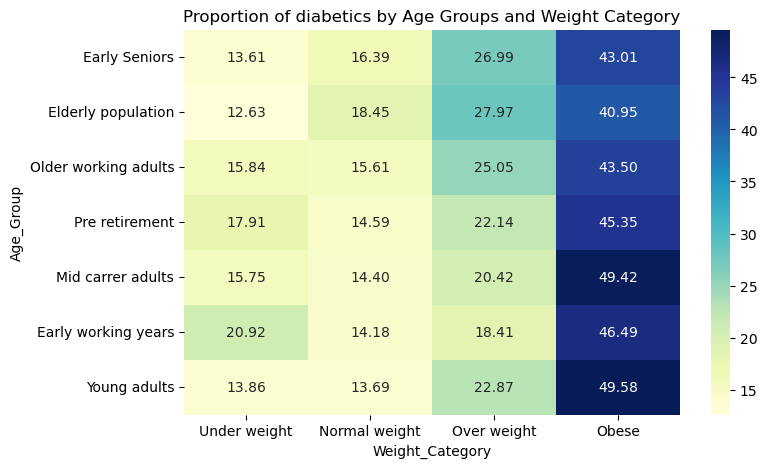

In [14]:
#plot a heatmap showing the percentage of diabetics by Age_Group and Weight categories
plt.figure(figsize=(8,5))
sns.heatmap(table, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Proportion of diabetics by Age Groups and Weight Category")
plt.show()

**3.3: Percentage of Diabetics and Non-Diabetics by Exercise Activity**

In [15]:
# Create a cross-tabulation showing the percentage of diabetic and non-diabetic individuals within each Exercise_Activites category
exercise_diabeties = pd.crosstab(df['Exercise_Activites'], df['Diabetes'],normalize='index')*100
exercise_diabeties

Diabetes,No,Yes
Exercise_Activites,,
No,72.614284,27.385716
Yes,85.354679,14.645321


**4.3: A piechart visualization for percentage of Diabetes People who exercise regularly and who do not**

<Axes: title={'center': 'Regular Exercise'}, ylabel='Yes'>

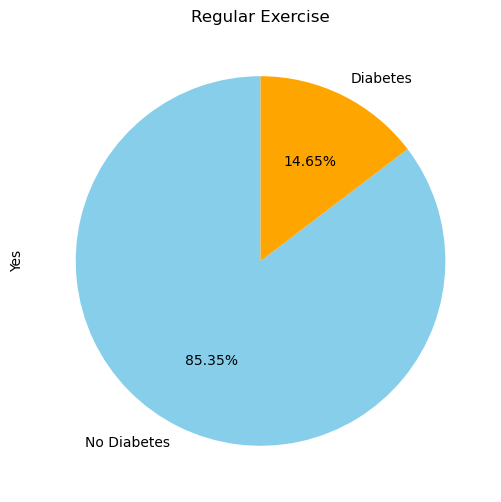

In [16]:
# Create pie chart
plt.figure(figsize=(6,6))   # square figure for a circular pie

# Pie chart for people who DO exercise
exercise_diabeties.loc['Yes'].plot(
    kind='pie',
    autopct='%1.2f%%',
    labels=['No Diabetes', 'Diabetes'],  #labels
    startangle=90,
    colors=['skyblue', 'orange'],
    title='Regular Exercise'
)

**3.4: Relationship between smoking status and diabetes** <br>
**4.4: Plot for relationship between smoking status and diabetes**

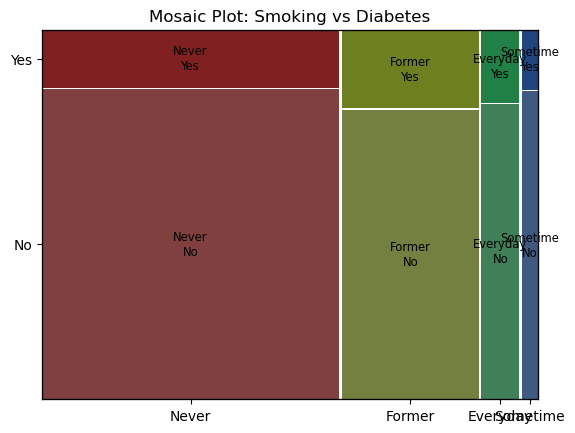

In [17]:
# Create a mosaic plot to visualize the relationship between smoking status and diabetes
mossaic_dig = mosaic(df, ['Somking_condtion', 'Diabetes'])

#Plot of the above mosaic plot
plt.title('Mosaic Plot: Smoking vs Diabetes')
plt.show()

**3.5: Calculation of Correlation Matrix Between weight, smoking habits, BMI, Age, and Diabetes**

In [18]:
# List of columns
cols = ['Somking_condtion', 'Weight_Category', 'BMI_actual', 'Age_Group', 'Exercise_Activites', 'Diabetes']

# Subset the dataframe
df_subset = df[cols].copy()

# Convert categorical variables to numeric codes
categorical_cols = ['Somking_condtion', 'Weight_Category', 'Age_Group', 'Exercise_Activites', 'Diabetes']
for col in categorical_cols:
    df_subset[col] = df_subset[col].astype('category').cat.codes

# Now compute correlation
corr_matrix = df_subset.corr()
corr_matrix

,Somking_condtion,Weight_Category,BMI_actual,Age_Group,Exercise_Activites,Diabetes
Somking_condtion,1.000000,0.152730,0.000555,-0.094623,0.080050,-0.029849
Weight_Category,0.152730,1.000000,0.212289,0.052782,0.002489,0.051515
BMI_actual,0.000555,0.212289,1.000000,0.004572,-0.135996,0.195112
Age_Group,-0.094623,0.052782,0.004572,1.000000,-0.091368,0.205160
Exercise_Activites,0.080050,0.002489,-0.135996,-0.091368,1.000000,-0.134759
Diabetes,-0.029849,0.051515,0.195112,0.205160,-0.134759,1.000000


**4.5: Plot of Correlation Matrix Between weight, smoking habits, BMI, Age, and Diabetes**

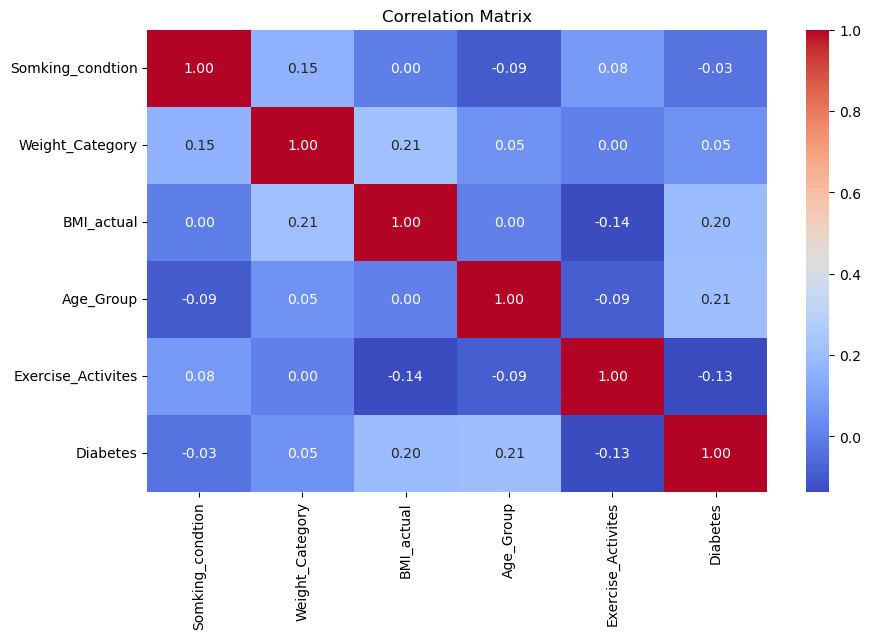

In [19]:
# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()